# **Textrank based on sentence embedding**
- extractive summarization
- used tennis article data set
- used pre-trained embedding(GloVe)

## **1. Download Pre-trained Embedding**
- GloVe, FastText, Word2Vec etc.
- We use GloVe

In [1]:
import numpy as np
import gensim
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

### 1.1 Download GloVe

In [2]:
urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

glove_dict = dict()
f = open('glove.6B.100d.txt', encoding="utf8") # 100차원의 GloVe 벡터를 사용

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    glove_dict[word] = word_vector_arr
f.close()

In [3]:
glove_dict['cat']   # embedding of 'cat'

array([ 0.23088  ,  0.28283  ,  0.6318   , -0.59411  , -0.58599  ,
        0.63255  ,  0.24402  , -0.14108  ,  0.060815 , -0.7898   ,
       -0.29102  ,  0.14287  ,  0.72274  ,  0.20428  ,  0.1407   ,
        0.98757  ,  0.52533  ,  0.097456 ,  0.8822   ,  0.51221  ,
        0.40204  ,  0.21169  , -0.013109 , -0.71616  ,  0.55387  ,
        1.1452   , -0.88044  , -0.50216  , -0.22814  ,  0.023885 ,
        0.1072   ,  0.083739 ,  0.55015  ,  0.58479  ,  0.75816  ,
        0.45706  , -0.28001  ,  0.25225  ,  0.68965  , -0.60972  ,
        0.19578  ,  0.044209 , -0.31136  , -0.68826  , -0.22721  ,
        0.46185  , -0.77162  ,  0.10208  ,  0.55636  ,  0.067417 ,
       -0.57207  ,  0.23735  ,  0.4717   ,  0.82765  , -0.29263  ,
       -1.3422   , -0.099277 ,  0.28139  ,  0.41604  ,  0.10583  ,
        0.62203  ,  0.89496  , -0.23446  ,  0.51349  ,  0.99379  ,
        1.1846   , -0.16364  ,  0.20653  ,  0.73854  ,  0.24059  ,
       -0.96473  ,  0.13481  , -0.0072484,  0.33016  , -0.1236

### 1.2 Download FastText

In [4]:
!pip install fasttext

     |████████████████████████████████| 68 kB 3.3 MB/s             
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=4733468 sha256=59b2ed4d5b3c6d6b5ca6c6da2970492ec6ae022309486967ae63b082b7bff31c
  Stored in directory: /home/tkddnjs1234/.cache/pip/wheels/c3/5c/d0/4a725c6ee7df3267d818d3bc9d89bb173b94832f2b9eca6368
Successfully built fasttext


In [5]:
# 300차원의 FastText 벡터 사용
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')

In [6]:
ft.get_word_vector('cat')   # embedding for 'cat'

array([ 0.08105576, -0.02083234, -0.03326922,  0.28555283,  0.13959414,
       -0.1977245 ,  0.10128298,  0.01085356, -0.103824  ,  0.04313416,
       -0.14833796, -0.16765352, -0.15447043, -0.14154345,  0.12743813,
        0.2279076 ,  0.07685639, -0.13873424, -0.20190817,  0.01528534,
       -0.06999817,  0.11306947,  0.01669297,  0.11389008,  0.02094817,
       -0.31620952,  0.09814467, -0.1449248 ,  0.09949644,  0.2211973 ,
        0.02225026,  0.06751259, -0.06465218,  0.11267239, -0.0256991 ,
       -0.04765478,  0.03917777,  0.00168321, -0.11691307, -0.27667975,
       -0.06021226,  0.11350961, -0.11300616,  0.08379158, -0.21970375,
        0.06771149,  0.0296645 , -0.05783203, -0.12882547,  0.09360313,
       -0.0628323 , -0.08581617,  0.17381558, -0.10044617, -0.28967732,
       -0.01837742,  0.01613754, -0.0155128 , -0.11910667,  0.20571907,
        0.2338278 ,  0.17166924,  0.07774843,  0.05795193, -0.05462614,
       -0.05604232,  0.07913449,  0.32939437, -0.21045874, -0.11

### 1.3 Download Word2Vec

In [7]:
# 300차원의 Word2Vec 벡터 사용
urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [8]:
word2vec_model['cat']   # embedding for 'cat'

array([ 0.0123291 ,  0.20410156, -0.28515625,  0.21679688,  0.11816406,
        0.08300781,  0.04980469, -0.00952148,  0.22070312, -0.12597656,
        0.08056641, -0.5859375 , -0.00445557, -0.296875  , -0.01312256,
       -0.08349609,  0.05053711,  0.15136719, -0.44921875, -0.0135498 ,
        0.21484375, -0.14746094,  0.22460938, -0.125     , -0.09716797,
        0.24902344, -0.2890625 ,  0.36523438,  0.41210938, -0.0859375 ,
       -0.07861328, -0.19726562, -0.09082031, -0.14160156, -0.10253906,
        0.13085938, -0.00346375,  0.07226562,  0.04418945,  0.34570312,
        0.07470703, -0.11230469,  0.06738281,  0.11230469,  0.01977539,
       -0.12353516,  0.20996094, -0.07226562, -0.02783203,  0.05541992,
       -0.33398438,  0.08544922,  0.34375   ,  0.13964844,  0.04931641,
       -0.13476562,  0.16308594, -0.37304688,  0.39648438,  0.10693359,
        0.22167969,  0.21289062, -0.08984375,  0.20703125,  0.08935547,
       -0.08251953,  0.05957031,  0.10205078, -0.19238281, -0.09

## **2. Sentence Embedding**

In [9]:
embedding_dim = 100
zero_vector = np.zeros(embedding_dim)

Change each words to GloVe vector.  
If OOV(Out Of Vocabulary) happens, change that words to zero vector.

In [16]:
# get sentence vector from avarage of word vector
def calculate_sentence_vector(sentence):
    return sum([glove_dict.get(word, zero_vector) for word in sentence])/len(sentence)

In [17]:
eng_sent = ['I', 'am', 'a', 'student']
sentence_vector = calculate_sentence_vector(eng_sent)
print(len(sentence_vector))
print(sentence_vector)

100
[ 0.09627501  0.15911625 -0.206665   -0.09319813 -0.20267     0.55644001
  0.09872098  0.2686925  -0.0662775   0.3336375   0.10304001  0.0905347
  0.22787275 -0.0249185  -0.1040125  -0.29569499 -0.040325   -0.21835426
 -0.199362    0.2866565  -0.02374499  0.20028425  0.02605    -0.13843275
  0.23545225 -0.1222      0.02755998 -0.364145    0.16206125  0.39495501
 -0.40334     0.83611251  0.093808    0.04415    -0.1090295  -0.1118375
 -0.2442575   0.1971195   0.27559    -0.06778    -0.33591    -0.16126176
  0.324517   -0.1197475   0.06183    -0.30903498  0.32620425 -0.04724
 -0.1719125  -0.534795   -0.2622     -0.34608999  0.13659     0.53222501
 -0.39189624 -1.83245     0.11925325 -0.0276925   1.26250005  0.0525175
  0.11187649  0.4361145  -0.52282749 -0.20084418  0.50792749  0.0175045
  0.248865    0.306705    0.03386499  0.20138749 -0.1196175  -0.1917375
 -0.01783    -0.20379475  0.0501325   0.2689815   0.32272751 -0.23137
 -0.68901749 -0.37855     0.29943426 -0.13399625 -0.123630

This GloVe is pre-trained for English so if we input Korean, all words cause OOV problem.
That is, all words are zero vector so average is zero vector.

In [12]:
kor_sent = ['전', '좋은', '학생', '입니다']
sentence_vector = calculate_sentence_vector(kor_sent)
print(sentence_vector)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## **3. Text summarization using text rank**

In [23]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/tkddnjs1234/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
stop_words = stopwords.words('english')

Download tennis articles dataset and save to data frame

In [21]:
urlretrieve("https://raw.githubusercontent.com/prateekjoshi565/textrank_text_summarization/master/tennis_articles_v4.csv", filename="tennis_articles_v4.csv")
data = pd.read_csv("tennis_articles_v4.csv")
data.head()

,article_id,article_text,source
0,1,Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,"BASEL, Switzerland (AP), Roger Federer advance...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


Tokenize article_text

In [27]:
data = data[['article_text']]
data['sentences'] = data['article_text'].apply(sent_tokenize)
print(data['sentences'][0])
data

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.', "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.", 'I think everyone knows this is my job here.', "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.", "I'm a pretty competitive girl.", "I say my hellos, but I'm not sending any players flowers as well.", "Uhm, I'm not really friendly or close to many players.", "I have not a lot of friends away from the courts.'", 'When she said she is not really close to a lot of players, is that something strategic that she is doing?', "Is it different on the men's tour than the women's tour?", "'No, not at all.", "I thin

,article_text,sentences
0,Maria Sharapova has basically no friends as te...,[Maria Sharapova has basically no friends as t...
1,"BASEL, Switzerland (AP), Roger Federer advance...","[BASEL, Switzerland (AP), Roger Federer advanc..."
2,Roger Federer has revealed that organisers of ...,[Roger Federer has revealed that organisers of...
3,Kei Nishikori will try to end his long losing ...,[Kei Nishikori will try to end his long losing...
4,"Federer, 37, first broke through on tour over ...","[Federer, 37, first broke through on tour over..."
5,Nadal has not played tennis since he was force...,[Nadal has not played tennis since he was forc...
6,"Tennis giveth, and tennis taketh away. The end...","[Tennis giveth, and tennis taketh away., The e..."
7,Federer won the Swiss Indoors last week by bea...,[Federer won the Swiss Indoors last week by be...


Make tokenize function and preprocessing function

In [28]:
# tokenization function
def tokenization(sentences):
    return [word_tokenize(sentence) for sentence in sentences]

# preprocessing
def preprocess_sentence(sentence):
  # 영어를 제외한 숫자, 특수 문자 등은 전부 제거. 모든 알파벳은 소문자화
  sentence = [re.sub(r'[^a-zA-z\s]', '', word).lower() for word in sentence]
  # 불용어가 아니면서 단어가 실제로 존재해야 한다.
  return [word for word in sentence if word not in stop_words and word]

# 위 전처리 함수를 모든 문장에 대해서 수행. 이 함수를 호출하면 모든 행에 대해서 수행.
def preprocess_sentences(sentences):
    return [preprocess_sentence(sentence) for sentence in sentences]

article_text => 문장 토큰화 => sentences  
sentences => 단어 토큰화, 전처리 => tokenized_sentences

In [29]:
data['tokenized_sentences'] = data['sentences'].apply(tokenization)
data['tokenized_sentences'] = data['tokenized_sentences'].apply(preprocess_sentences)
data

,article_text,sentences,tokenized_sentences
0,Maria Sharapova has basically no friends as te...,[Maria Sharapova has basically no friends as t...,"[[maria, sharapova, basically, friends, tennis..."
1,"BASEL, Switzerland (AP), Roger Federer advance...","[BASEL, Switzerland (AP), Roger Federer advanc...","[[basel, switzerland, ap, roger, federer, adva..."
2,Roger Federer has revealed that organisers of ...,[Roger Federer has revealed that organisers of...,"[[roger, federer, revealed, organisers, relaun..."
3,Kei Nishikori will try to end his long losing ...,[Kei Nishikori will try to end his long losing...,"[[kei, nishikori, try, end, long, losing, stre..."
4,"Federer, 37, first broke through on tour over ...","[Federer, 37, first broke through on tour over...","[[federer, first, broke, tour, two, decades, a..."
5,Nadal has not played tennis since he was force...,[Nadal has not played tennis since he was forc...,"[[nadal, played, tennis, since, forced, retire..."
6,"Tennis giveth, and tennis taketh away. The end...","[Tennis giveth, and tennis taketh away., The e...","[[tennis, giveth, tennis, taketh, away], [end,..."
7,Federer won the Swiss Indoors last week by bea...,[Federer won the Swiss Indoors last week by be...,"[[federer, swiss, indoors, last, week, beating..."


GloVe vector dim = 100  
Make 100 dimension zero vector

In [30]:
embedding_dim = 100
zero_vector = np.zeros(embedding_dim)

Make function that get average of word vectors.  
When sentence length is 0, return 100 dimension zero vector.  
Now we've removed stopwords, there can be exist 0 length sentence after removing stopwords.

In [31]:
# get sentence vector from average of word vector
def calculate_sentence_vector(sentence):
    if len(sentence) != 0:
        return sum([glove_dict.get(word, zero_vector) for word in sentence])/len(sentence)
    else:
        return zero_vector

In [32]:
# return sentence vector for each sentences
def sentences_to_vectors(sentences):
    return [calculate_sentence_vector(sentence) for sentence in sentences]

In [41]:
data['SentenceEmbedding'] = data['tokenized_sentences'].apply(sentences_to_vectors)
data[['SentenceEmbedding']]


,SentenceEmbedding
0,"[[0.051488996, 0.1105585, 0.6950863, 0.1891917..."
1,"[[0.10566062456928194, -0.10534465219825506, 0..."
2,"[[-0.022272188, -0.0474477, 0.14933074, -0.086..."
3,"[[0.045201838, -0.064647146, 0.5035717, -0.160..."
4,"[[0.21536233, 0.180915, 0.25600883, 0.06924241..."
5,"[[0.04484453, -0.0074302587, 0.33349112, -0.07..."
6,"[[-0.115338005, -0.0062844106, 0.595185, -0.16..."
7,"[[0.0740439, 0.059211146, 0.49143884, 0.216771..."


Make cosine similarity matrix among sentence vectors.  
The size of this matrix is (sentence# x sentence#)

In [42]:
def similarity_matrix(sentence_embedding):
    sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
    for i in range(len(sentence_embedding)):
        for j in range(len(sentence_embedding)):
            sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, embedding_dim), sentence_embedding[j].reshape(1, embedding_dim))[0,0]
    return sim_mat

In [44]:
data['SimMatrix'] = data['SentenceEmbedding'].apply(similarity_matrix)
data

,article_text,sentences,tokenized_sentences,SentenceEmbedding,SimMatrix
0,Maria Sharapova has basically no friends as te...,[Maria Sharapova has basically no friends as t...,"[[maria, sharapova, basically, friends, tennis...","[[0.051488996, 0.1105585, 0.6950863, 0.1891917...","[[1.0, 0.6477208733558655, 0.5915699601173401,..."
1,"BASEL, Switzerland (AP), Roger Federer advance...","[BASEL, Switzerland (AP), Roger Federer advanc...","[[basel, switzerland, ap, roger, federer, adva...","[[0.10566062456928194, -0.10534465219825506, 0...","[[1.0, 0.8745531210608367, 0.8054854557907093,..."
2,Roger Federer has revealed that organisers of ...,[Roger Federer has revealed that organisers of...,"[[roger, federer, revealed, organisers, relaun...","[[-0.022272188, -0.0474477, 0.14933074, -0.086...","[[1.0000001192092896, 0.9130854606628418, 0.89..."
3,Kei Nishikori will try to end his long losing ...,[Kei Nishikori will try to end his long losing...,"[[kei, nishikori, try, end, long, losing, stre...","[[0.045201838, -0.064647146, 0.5035717, -0.160...","[[0.9999998807907104, 0.7769179305294042, 0.84..."
4,"Federer, 37, first broke through on tour over ...","[Federer, 37, first broke through on tour over...","[[federer, first, broke, tour, two, decades, a...","[[0.21536233, 0.180915, 0.25600883, 0.06924241...","[[1.0000001192092896, 0.8306209732530097, 0.90..."
5,Nadal has not played tennis since he was force...,[Nadal has not played tennis since he was forc...,"[[nadal, played, tennis, since, forced, retire...","[[0.04484453, -0.0074302587, 0.33349112, -0.07...","[[1.0, 0.8843014240264893, 0.8540289072721128,..."
6,"Tennis giveth, and tennis taketh away. The end...","[Tennis giveth, and tennis taketh away., The e...","[[tennis, giveth, tennis, taketh, away], [end,...","[[-0.115338005, -0.0062844106, 0.595185, -0.16...","[[1.0, 0.473054975271225, 0.45002683997154236,..."
7,Federer won the Swiss Indoors last week by bea...,[Federer won the Swiss Indoors last week by be...,"[[federer, swiss, indoors, last, week, beating...","[[0.0740439, 0.059211146, 0.49143884, 0.216771...","[[1.0, 0.7634095600081804, 0.7822569012641907,..."


In [45]:
print('두번째 샘플의 문장 개수 :',len(data['tokenized_sentences'][1]))
print('두번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) :',np.shape(data['SentenceEmbedding'][1]))
print('두번째 샘플의 유사도 행렬의 크기(shape) :',data['SimMatrix'][1].shape)

두번째 샘플의 문장 개수 : 12
두번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) : (12, 100)
두번째 샘플의 유사도 행렬의 크기(shape) : (12, 12)


Make function that draw graph from given similarity matrix

In [47]:
def draw_graphs(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
    plt.show()

2nd 샘플의 유사도 행렬로부터 그린 그래프  
문장의 갯수가 12개 => 12개의 node

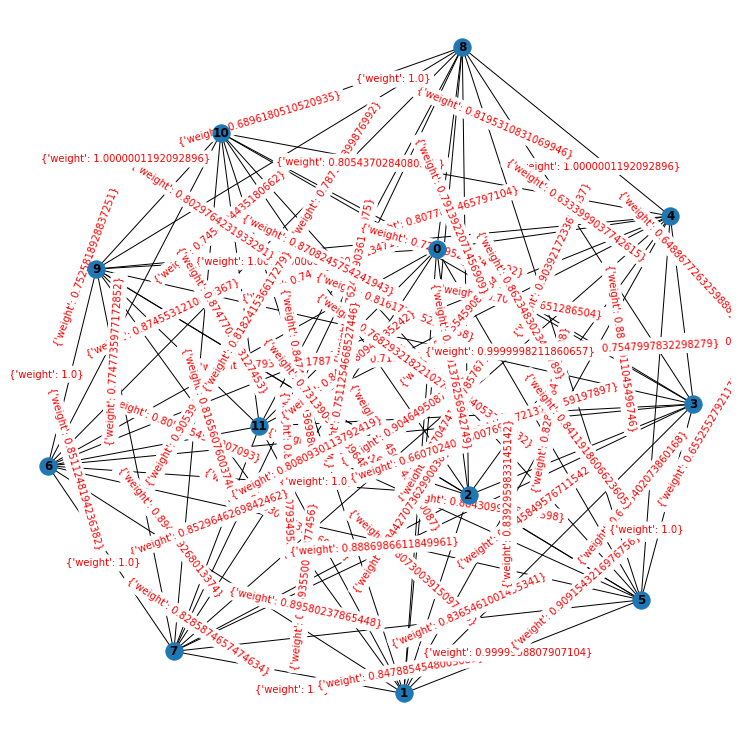

In [48]:
draw_graphs(data['SimMatrix'][1])

위 그래프를 페이지랭크 알고리즘의 입력으로 넣어 각 문장의 score 구하기

In [49]:
def calculate_score(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)
    return scores

In [50]:
data['score'] = data['SimMatrix'].apply(calculate_score)
data[['SimMatrix', 'score']]

,SimMatrix,score
0,"[[1.0, 0.6477208733558655, 0.5915699601173401,...","{0: 0.05492159242624364, 1: 0.0628651999814638..."
1,"[[1.0, 0.8745531210608367, 0.8054854557907093,...","{0: 0.08315094474060455, 1: 0.0849861140529650..."
2,"[[1.0000001192092896, 0.9130854606628418, 0.89...","{0: 0.06148440881336138, 1: 0.0622486433297316..."
3,"[[0.9999998807907104, 0.7769179305294042, 0.84...","{0: 0.08164727931345295, 1: 0.0727647944644765..."
4,"[[1.0000001192092896, 0.8306209732530097, 0.90...","{0: 0.055686900055508824, 1: 0.050992318615516..."
5,"[[1.0, 0.8843014240264893, 0.8540289072721128,...","{0: 0.08288694357042936, 1: 0.0840376024640333..."
6,"[[1.0, 0.473054975271225, 0.45002683997154236,...","{0: 0.07336251752688192, 1: 0.1050889008112474..."
7,"[[1.0, 0.7634095600081804, 0.7822569012641907,...","{0: 0.043210392890095706, 1: 0.047333398905178..."


두 번째 샘플의 각 문장의 점수

In [51]:
data['score'][1]

{0: 0.08315094474060455,
 1: 0.08498611405296501,
 2: 0.08555019786198463,
 3: 0.08383717299575927,
 4: 0.0813794030791188,
 5: 0.08439285067975581,
 6: 0.08507725735628792,
 7: 0.08092839280412682,
 8: 0.07454046000848007,
 9: 0.08535836572027003,
 10: 0.0849824249168908,
 11: 0.08581641578375629}

점수가 가장 높은 문장들을 상위 n개 선택하여 요약문으로 삼기.  
점수가 가장 높은 상위 3개의 문장 선택.  
점수에 따라 정렬한 뒤 상위 3개 문장만 return.

In [53]:
def ranked_sentences(sentences, scores, n=3):
    top_scores = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
    top_n_sentences = [sentence for score,sentence in top_scores[:n]]
    return " ".join(top_n_sentences)

이 함수를 사용해 summary 열 만들기

In [54]:
data['summary'] = data.apply(lambda x: ranked_sentences(x.sentences, x.score), axis=1)

In [55]:
for i in range(0, len(data)):
    print(i+1,'번 문서')
    print('원문 :',data.loc[i].article_text)
    print('')
    print('요약 :',data.loc[i].summary)
    print('')

1 번 문서
원문 : Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're i